<a href="https://colab.research.google.com/github/nhahub/NHA-148/blob/main/project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading data
data = load_dataset('ashraq/fashion-product-images-small')
df = data['train'].to_pandas()
df

README.md:   0%|          | 0.00/867 [00:00<?, ?B/s]

data/train-00000-of-00002-6cff4c59f91661(…):   0%|          | 0.00/136M [00:00<?, ?B/s]

data/train-00001-of-00002-bb459e5ac5f01e(…):   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
...,...,...,...,...,...,...,...,...,...,...,...
44067,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
44068,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
44069,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
44070,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
# dropping id column
df.drop('id', axis=1, inplace=True)
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


# EDA

In [ ]:
# printing some basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44072 entries, 0 to 44071
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              44072 non-null  object 
 1   masterCategory      44072 non-null  object 
 2   subCategory         44072 non-null  object 
 3   articleType         44072 non-null  object 
 4   baseColour          44072 non-null  object 
 5   season              44072 non-null  object 
 6   year                44072 non-null  float64
 7   usage               44072 non-null  object 
 8   productDisplayName  44072 non-null  object 
 9   image               44072 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.4+ MB


In [ ]:
# checking for missing values
df.isnull().sum()

,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0
productDisplayName,0
image,0


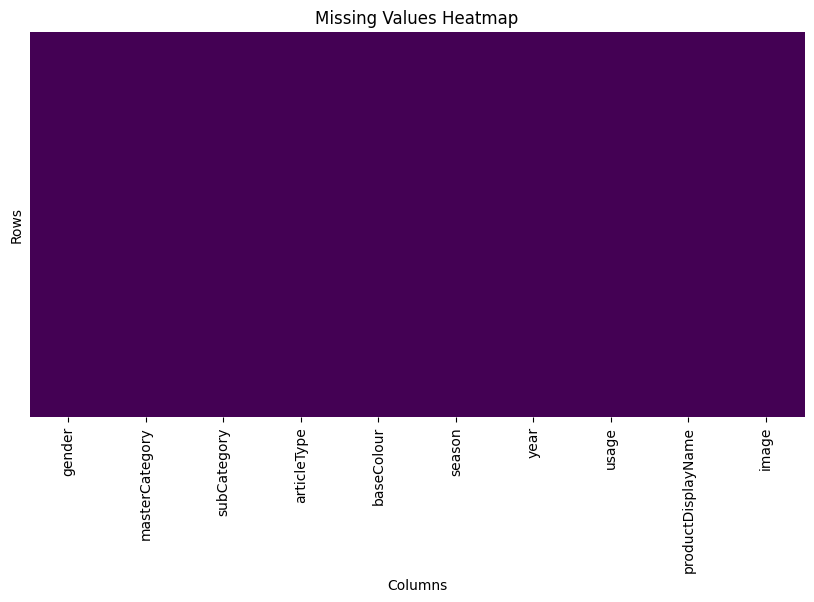

In [ ]:
# visualizing missing
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False , yticklabels=False , cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [ ]:
# checking for duplicates with skipping image column
df.drop('image', axis=1).duplicated().sum()

np.int64(10754)

- looks like we have some duplicates in the data

In [ ]:
# checking categorical columns values
for col in df.drop(columns = ['productDisplayName' , 'image']).select_dtypes(include='object').columns:
    print(f'{col} : {df[col].unique()}')
    print('------------------------------------------------------------')

gender : ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
------------------------------------------------------------
masterCategory : ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
------------------------------------------------------------
subCategory : ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
------------------------------------------------------------
articleType : ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops

In [ ]:
# checking number of unique values in each column
for col in df.drop(columns = [ 'image']).columns:
    print(f'{col} : {df[col].nunique()}')
    print('------------------------------------------------------------')

gender : 5
------------------------------------------------------------
masterCategory : 7
------------------------------------------------------------
subCategory : 45
------------------------------------------------------------
articleType : 141
------------------------------------------------------------
baseColour : 46
------------------------------------------------------------
season : 4
------------------------------------------------------------
year : 13
------------------------------------------------------------
usage : 8
------------------------------------------------------------
productDisplayName : 30801
------------------------------------------------------------


- looks like there's almost no inconsistancy but there is some overlap in values between columns

In [ ]:
# checking images duplicates
import hashlib

# converting images into hash values to recognise duplicates
def hash_image(img_bytes):
    return hashlib.md5(img_bytes).hexdigest()

# Extract raw bytes and check for duplicates
df["image_hash"] = df["image"].apply(lambda x: hash_image(x["bytes"]))
df['image_hash'].duplicated().sum()


np.int64(778)

- number of duplicates in image is lower than the text in the data

In [ ]:
# checking duplicates for both text data and images togehter
df.drop('image', axis=1).duplicated().sum()

np.int64(540)

- so the final thoughts is that there is only 540 duplicated rows


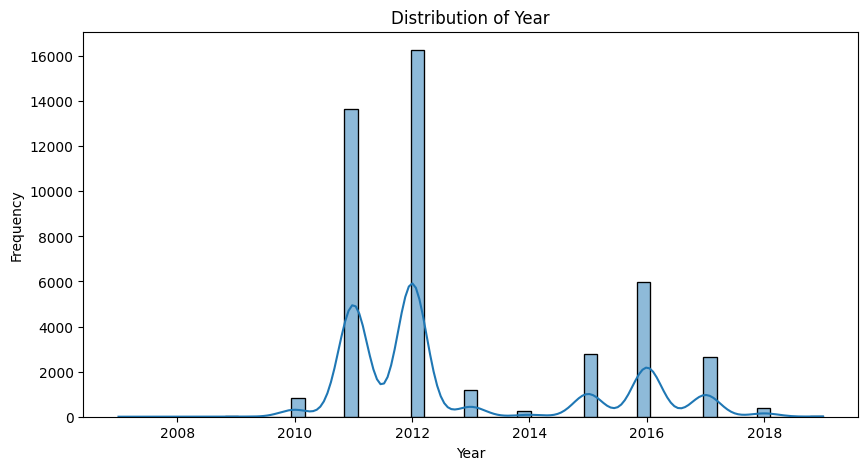

In [ ]:
# checking distribution for year column
plt.figure(figsize=(10, 5))
sns.histplot(df['year'], kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

- looks like this dataset is not much up-to-date
- fashion around 2011 and 2012 froms most of the data

In [ ]:
# checking class balance
df.usage.value_counts()

,count
usage,
Casual,34392
Sports,4004
Ethnic,3208
Formal,2345
Smart Casual,67
Party,29
Travel,26
Home,1


- there is huge class imbalance in the dataset

# data cleaning

In [ ]:
# drop duplicated rows
duplicated_rows = df[df.drop(columns='image').duplicated()].index
df.drop( index=duplicated_rows , inplace=True)
df

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,b2a14e4f4d4a386517a575407ed1a19f
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,35dbd5098857f92c4c7a515f0ee09ba1
2,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,fd311df25e014cc624a2e4c213b3fa2e
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2bd7322cf550042007b9cda4517ff251
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,c4f464cf8c2a50236f5f3b27648b8e5e
...,...,...,...,...,...,...,...,...,...,...,...
44067,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,421fed7d7d46a06fdcb988cffccf0ea2
44068,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f2688260454d8b3b005936b2a4152408
44069,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,75f9ba00b2155578bac3e18c37ee596c
44070,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,571bf7731aad2515d7010705f06472b7


In [ ]:
# dropping low samples classes depending on usage column
small_classes = ['Smart Casual' , 'Party' , 'Travel' , 'Home']
df = df[~df['usage'].isin(small_classes)]
df

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,b2a14e4f4d4a386517a575407ed1a19f
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,35dbd5098857f92c4c7a515f0ee09ba1
2,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,fd311df25e014cc624a2e4c213b3fa2e
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2bd7322cf550042007b9cda4517ff251
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,c4f464cf8c2a50236f5f3b27648b8e5e
...,...,...,...,...,...,...,...,...,...,...,...
44067,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,421fed7d7d46a06fdcb988cffccf0ea2
44068,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f2688260454d8b3b005936b2a4152408
44069,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,75f9ba00b2155578bac3e18c37ee596c
44070,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,571bf7731aad2515d7010705f06472b7


In [ ]:
# balancing the classes using under sampling
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = df[df.usage == 'Casual']
minority_classes = df[df.usage != 'Casual']
# Downsample majority class
majority_downsampled = resample(majority_class,
                                 replace=False,    # sample without replacement
                                 n_samples=minority_classes.usage.value_counts().max(), # to match minority class
                                 random_state=42) # reproducible results
# Combine minority classes with downsampled majority class
df_balanced = pd.concat([majority_downsampled, minority_classes])
df_balanced.usage.value_counts()

,count
usage,
Casual,4004
Sports,4004
Ethnic,3206
Formal,2285


In [ ]:
df_balanced.reset_index(drop=True, inplace=True)
df_balanced

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash
0,Men,Footwear,Shoes,Casual Shoes,Black,Fall,2011.0,Casual,iD Men Casual Black Shoes,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f0526073b5b3358950cee22c09d517f7
1,Men,Apparel,Topwear,Shirts,White,Summer,2012.0,Casual,Denizen Men White Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6cb1a32eabcb9a7803ac87ec100b4345
2,Unisex,Accessories,Watches,Watches,Yellow,Winter,2016.0,Casual,Q&Q Kids Unisex White Dial Analog Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1153c0891b8ca9df6a54ee6d7996a802
3,Men,Apparel,Topwear,Tshirts,Pink,Fall,2011.0,Casual,Flying Machine Men Damson Maroon Tshirts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,bbb7fd63998312867edf2da30f82f48e
4,Men,Apparel,Innerwear,Innerwear Vests,Black,Summer,2016.0,Casual,Levis Men Black & White Innerwear Vest,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,cac4d0dc316cc3c36325f393fc757034
...,...,...,...,...,...,...,...,...,...,...,...
13494,Men,Apparel,Bottomwear,Shorts,White,Spring,2013.0,Sports,Nike Men As Woven Shor White Shorts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,8b481616853c51c6a230e60c4c41b0f4
13495,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Black T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,001facfba4a202f6d816c36b9a25d7dd
13496,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Fila Men's Leonard White Black Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,5a36b4912283c3926ca9155a96f41337
13497,Men,Apparel,Topwear,Tshirts,Red,Fall,2010.0,Sports,Kipsta Men Loose Fit Round Neck Jersey Red,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,e7de9cb7ec803a1d3a283b99eb140ad4


- converting image column to pixels

In [ ]:
# getting image pixels values
import io
from PIL import Image

def get_img_pixels(img_dict):
    img_bytes = img_dict["bytes"]
    # Convert bytes → PIL Image
    img = Image.open(io.BytesIO(img_bytes))

    # Convert PIL Image → numpy array of pixels
    pixels = np.array(img)
    return pixels

df_balanced['image_pixels'] = df_balanced['image'].apply(get_img_pixels)
df_balanced['image_pixels']

,image_pixels
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...
13494,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13495,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13496,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13497,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


# visualizations


In [ ]:
df_balanced

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash,image_pixels
0,Men,Footwear,Shoes,Casual Shoes,Black,Fall,2011.0,Casual,iD Men Casual Black Shoes,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f0526073b5b3358950cee22c09d517f7,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Men,Apparel,Topwear,Shirts,White,Summer,2012.0,Casual,Denizen Men White Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6cb1a32eabcb9a7803ac87ec100b4345,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Unisex,Accessories,Watches,Watches,Yellow,Winter,2016.0,Casual,Q&Q Kids Unisex White Dial Analog Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1153c0891b8ca9df6a54ee6d7996a802,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Men,Apparel,Topwear,Tshirts,Pink,Fall,2011.0,Casual,Flying Machine Men Damson Maroon Tshirts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,bbb7fd63998312867edf2da30f82f48e,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Men,Apparel,Innerwear,Innerwear Vests,Black,Summer,2016.0,Casual,Levis Men Black & White Innerwear Vest,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,cac4d0dc316cc3c36325f393fc757034,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
13494,Men,Apparel,Bottomwear,Shorts,White,Spring,2013.0,Sports,Nike Men As Woven Shor White Shorts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,8b481616853c51c6a230e60c4c41b0f4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13495,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Black T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,001facfba4a202f6d816c36b9a25d7dd,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13496,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Fila Men's Leonard White Black Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,5a36b4912283c3926ca9155a96f41337,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13497,Men,Apparel,Topwear,Tshirts,Red,Fall,2010.0,Sports,Kipsta Men Loose Fit Round Neck Jersey Red,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,e7de9cb7ec803a1d3a283b99eb140ad4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


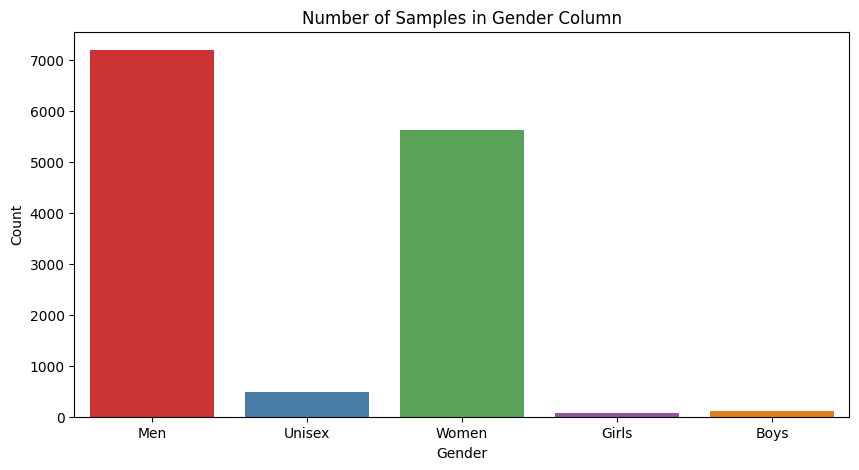

In [ ]:
# visualizing number of samples in gender
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df_balanced, palette='Set1')
plt.title('Number of Samples in Gender Column')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

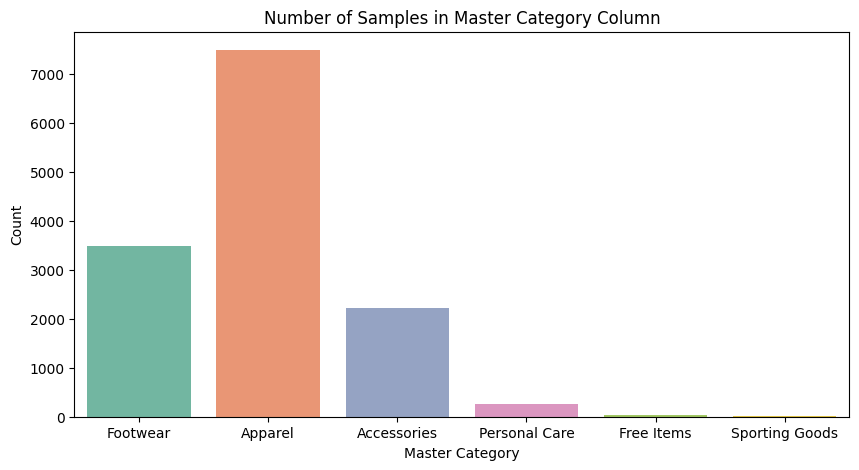

In [ ]:
# visualizing number of samples in masterCategory feature
plt.figure(figsize=(10, 5))
sns.countplot(x='masterCategory', data=df_balanced , palette='Set2')
plt.title('Number of Samples in Master Category Column')
plt.xlabel('Master Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

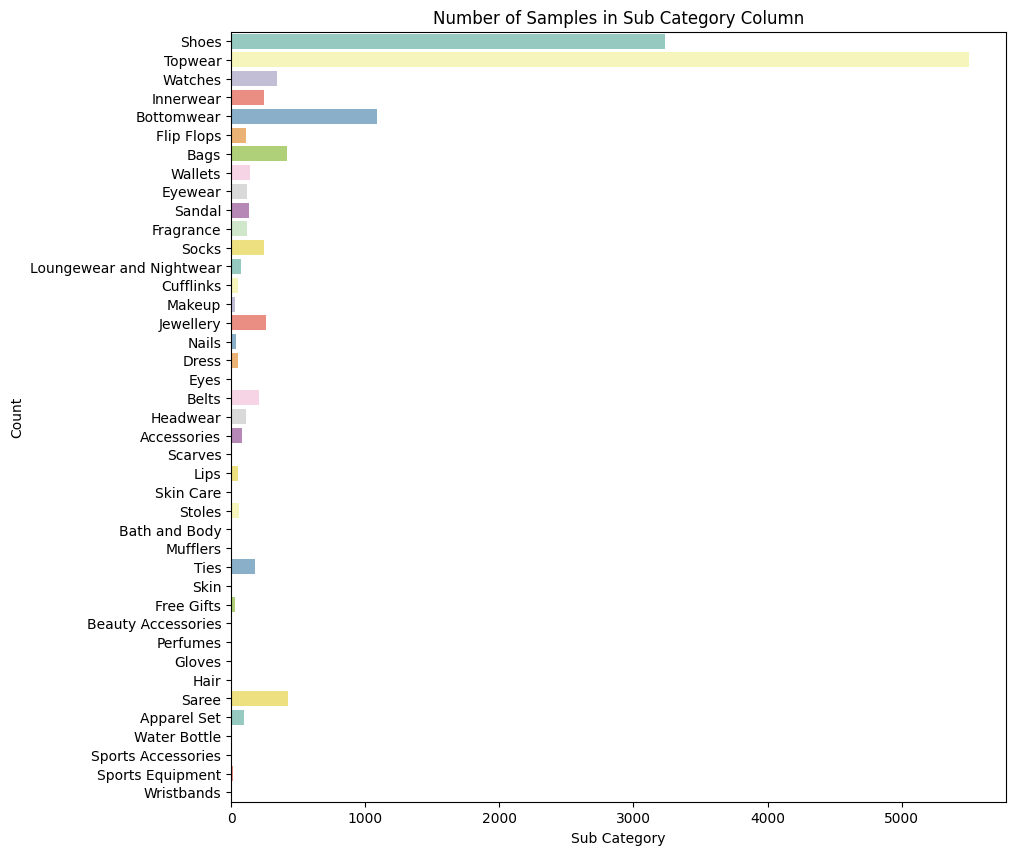

In [ ]:
# visualizing number of samples in subCategory column
plt.figure(figsize=(10, 10))
sns.countplot(y='subCategory', data=df_balanced , palette='Set3')
plt.title('Number of Samples in Sub Category Column')
plt.xlabel('Sub Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

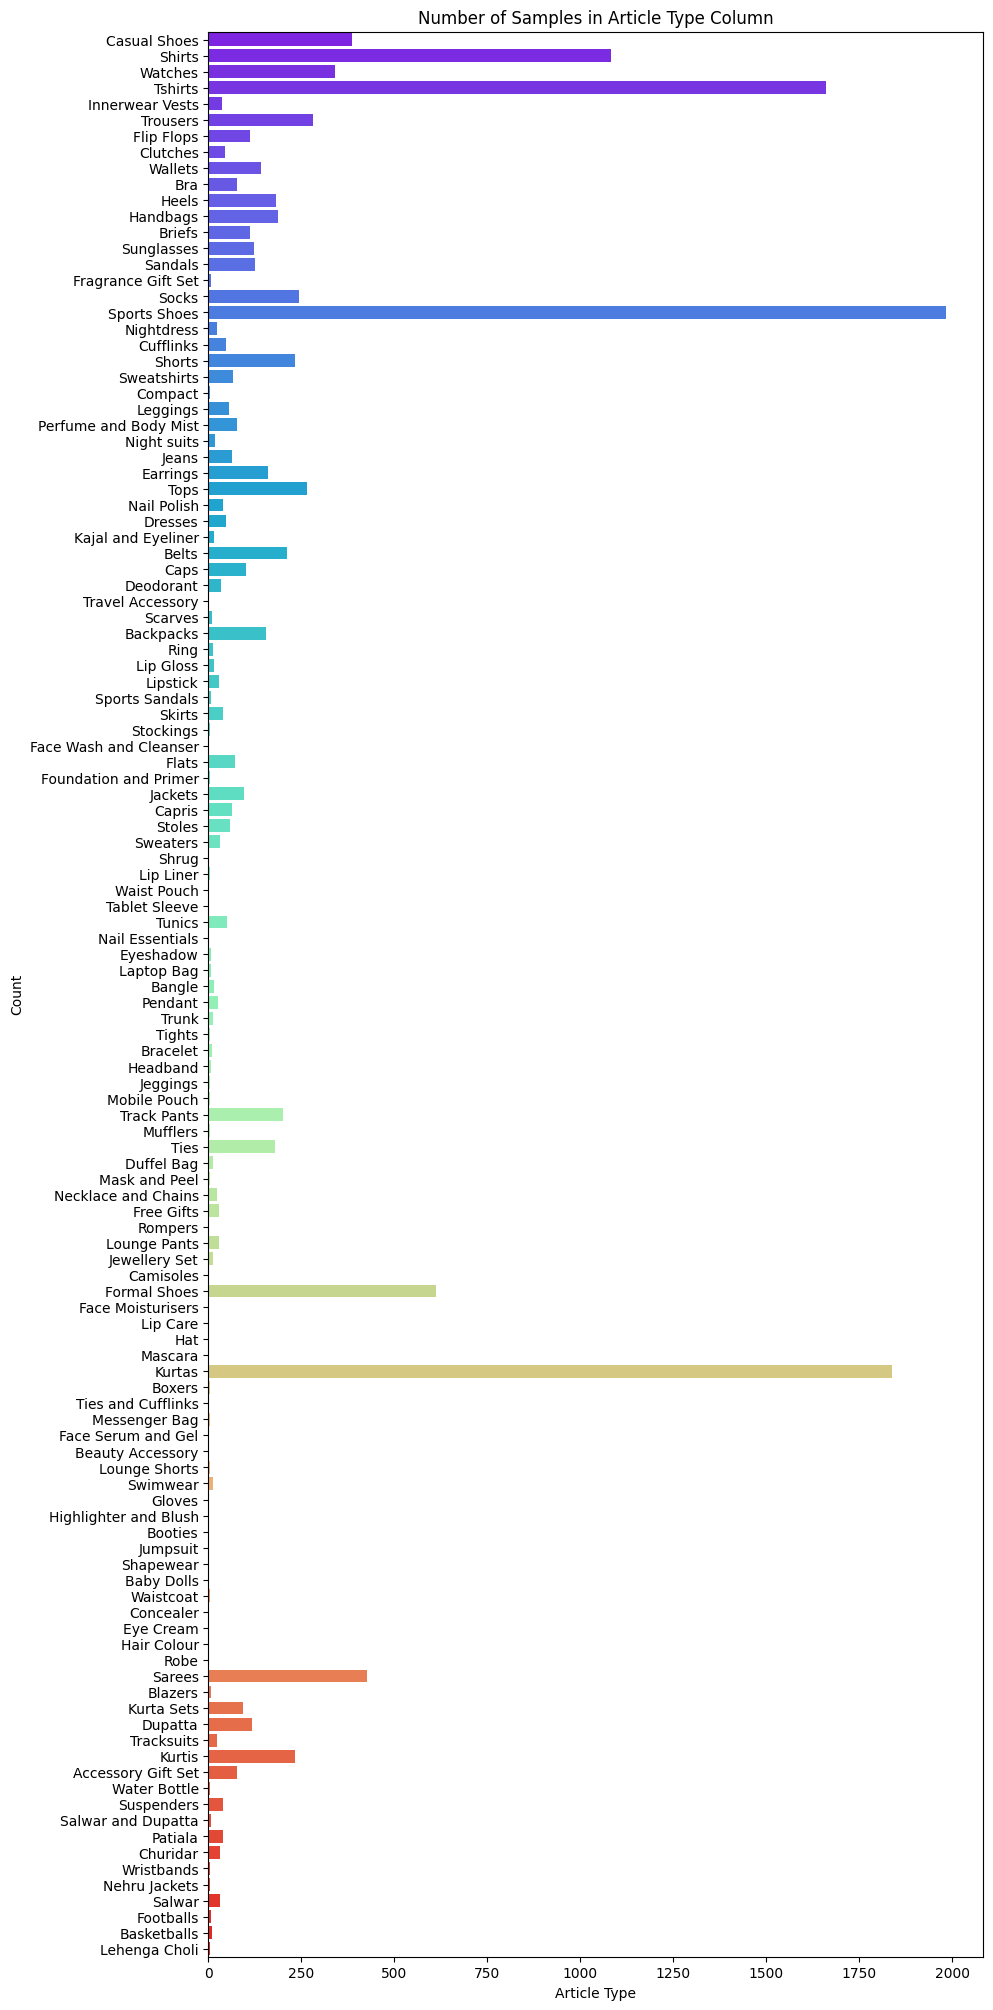

In [ ]:
# visualizing the number of samples in articleType column
plt.figure(figsize=(10, 25))
sns.countplot(y='articleType', data=df_balanced , palette='rainbow')
plt.title('Number of Samples in Article Type Column')
plt.xlabel('Article Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

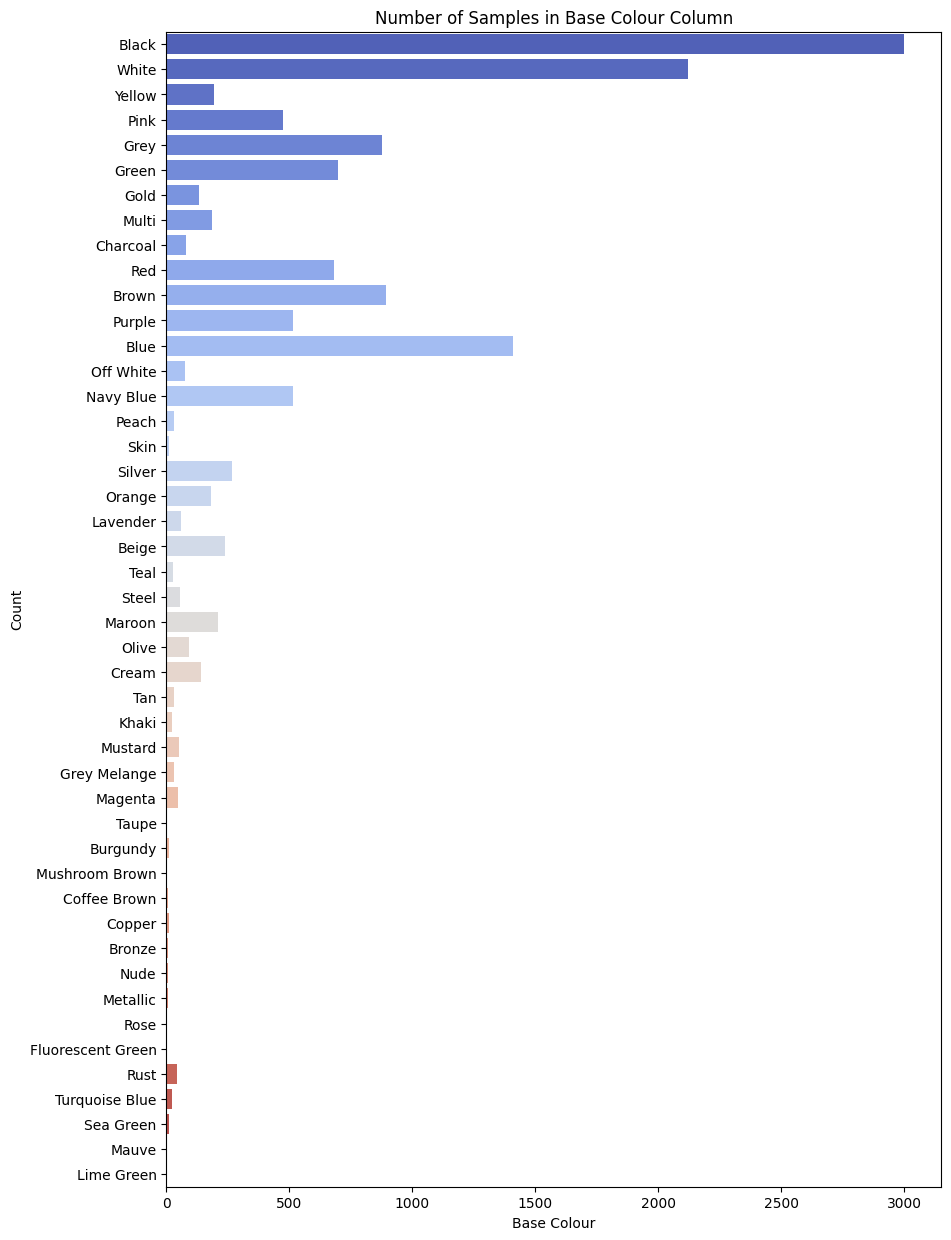

In [ ]:
# visualizing number of samples for baseColour column
plt.figure(figsize=(10, 15))
sns.countplot(y='baseColour', data=df_balanced , palette='coolwarm')
plt.title('Number of Samples in Base Colour Column')
plt.xlabel('Base Colour')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

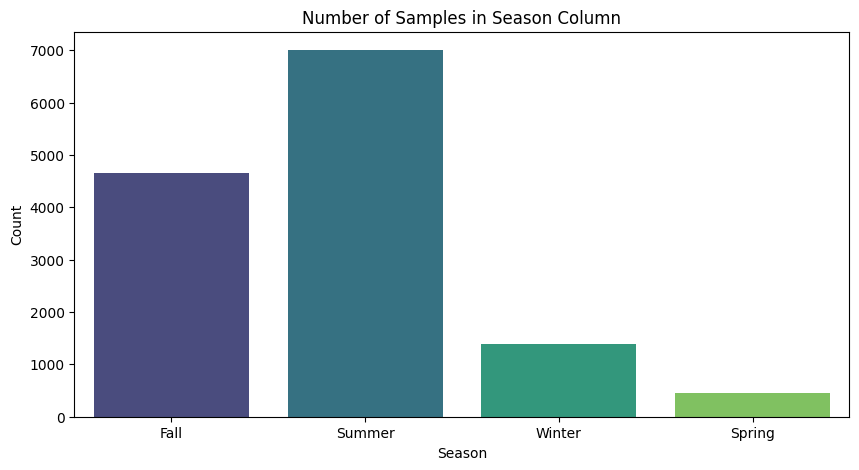

In [ ]:
# visualizing the number of samples in season column
plt.figure(figsize=(10, 5))
sns.countplot(x='season', data=df_balanced  , palette='viridis')
plt.title('Number of Samples in Season Column')
plt.xlabel('Season')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

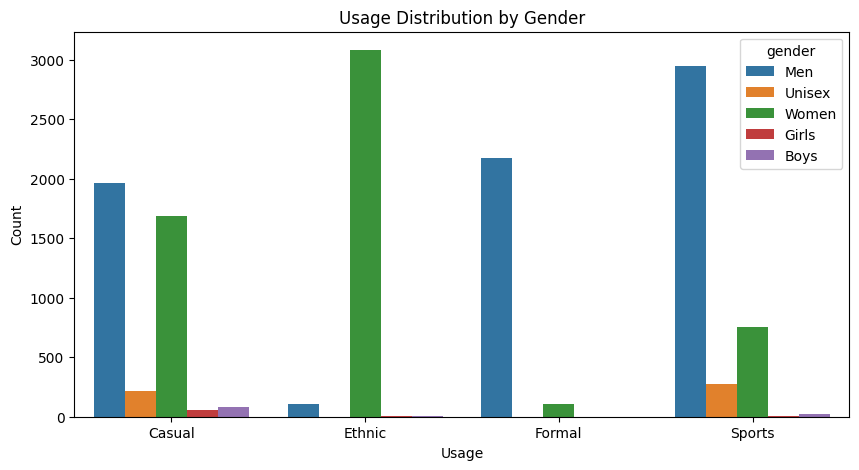

In [ ]:
# visualizing usage hued by gender
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', hue='gender', data=df_balanced)
plt.title('Usage Distribution by Gender')
plt.xlabel('Usage')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

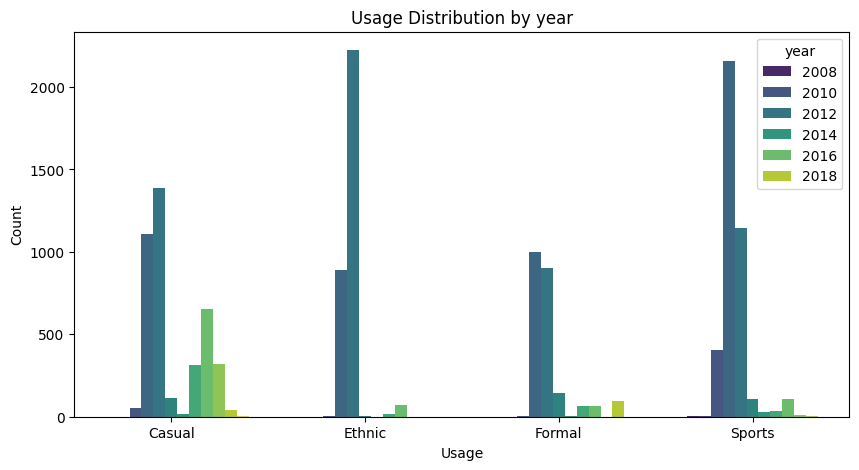

In [ ]:
# visualizing usage hued by year
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', hue='year', data=df_balanced , palette = 'viridis')
plt.title('Usage Distribution by year')
plt.xlabel('Usage')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

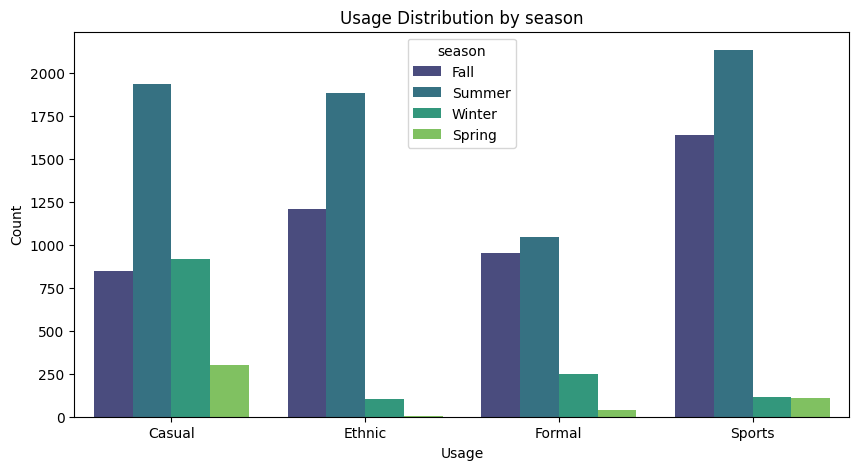

In [ ]:
# visualizing usage hued by season
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', hue='season', data=df_balanced , palette = 'viridis')
plt.title('Usage Distribution by season')
plt.xlabel('Usage')
plt.ylabel('Count')

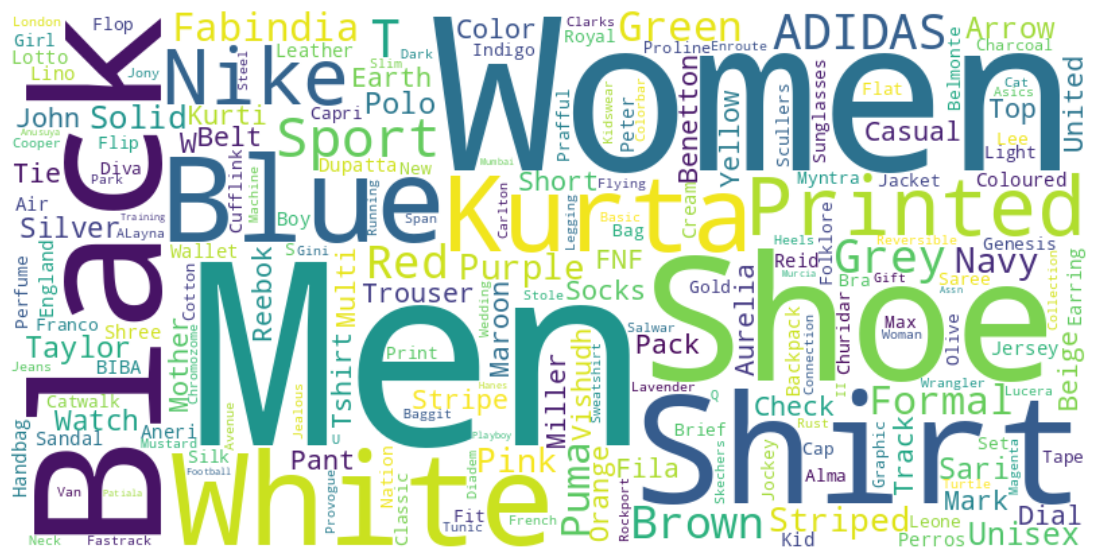

In [ ]:
# visualizing the most frequent words in our text
from wordcloud import WordCloud

corpus = " ".join(df_balanced['productDisplayName'])
# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white', # You can choose any background color
    colormap='viridis', # A colormap for word colors
    max_words=200, # Maximum number of words to display
    collocations=False # Disable generating bigrams (pairs of words)
).generate(corpus)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

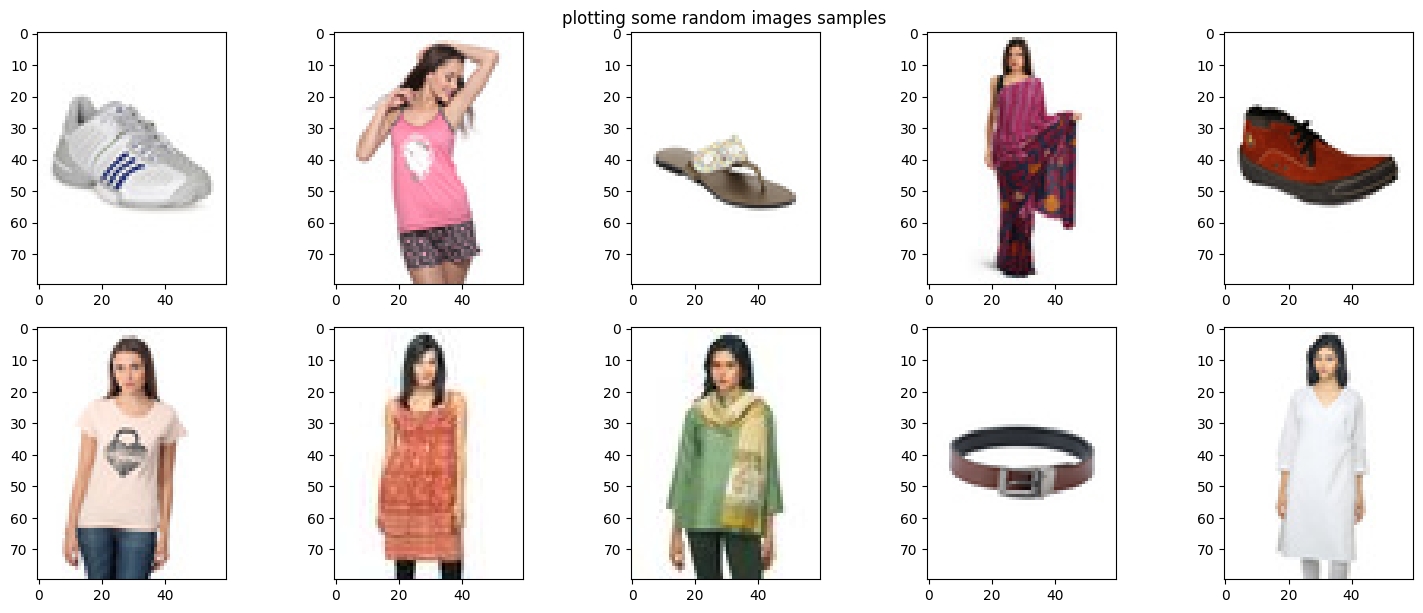

In [ ]:
# displaying some images samples
fig =1
plt.figure(figsize=(15,15))
plt.suptitle('plotting some random images samples')
for img in df_balanced['image_pixels'].sample(10).values:
    plt.subplot(5,5,fig)
    plt.imshow(img)
    fig +=1

plt.tight_layout()
plt.show()

- looks like images resolution is not that good

# splitting data
- we'll be working with only 3 columns:
- `image pixels`
- ` product display name `
- ` usage `

In [ ]:
# splitting target from features
x = df_balanced[['productDisplayName' , 'image_pixels']]
y = df_balanced['usage']



In [ ]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

# data preprocessing

### for images :
- make all photos of size 128x128
- improve image quality
- normalize all images to range from 0 to 1

In [ ]:
import cv2
import numpy as np

def preprocess_image(img):
    """
    Preprocess image:
    - Sharpen
    - Resize to 128x128
    - Normalize [0,1]
    """
    if img is None or not isinstance(img, np.ndarray):
        return None

    # Ensure 3 channels (convert grayscale to BGR)
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Sharpen
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img, -1, kernel)

    # Resize
    resized = cv2.resize(sharpened, (128, 128), interpolation=cv2.INTER_AREA)

    # Normalize
    normalized = resized.astype("float32") / 255.0

    return normalized




In [ ]:
# enhancing images
from joblib import Parallel, delayed
x_train['image_pixels'] = Parallel(n_jobs=4)(delayed(preprocess_image)(img) for img in x_train['image_pixels'])
x_test['image_pixels'] = Parallel(n_jobs=4)(delayed(preprocess_image)(img) for img in x_test['image_pixels'])



In [ ]:
x_train.shape


(10799, 2)

### for target :
- encoding using label encoder

In [ ]:
# applying label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


### text preprocessing
- using pretrained model

In [ ]:
# encoding the text using pretrained model (Bert)
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm

# Put model in evaluation mode
model.eval()

# Optional: Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to get mean pooled embedding
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embedding




In [ ]:
# Apply to DataFrame column
tqdm.pandas()  # for progress bar
x_train["productEmbedding"] = x_train["productDisplayName"].progress_apply(get_embedding)
x_test["productEmbedding"] = x_test["productDisplayName"].progress_apply(get_embedding)

100%|██████████| 2700/2700 [04:27<00:00, 10.11it/s]


In [ ]:
x_train['productEmbedding']

,productEmbedding
9372,"[0.72427547, -0.24629416, -0.52753526, -0.0616..."
11118,"[0.1917454, 0.017584328, -0.7149372, -0.147989..."
13177,"[0.20069282, -0.68254113, -0.1824408, 0.055097..."
5025,"[0.2761686, -0.122196525, -0.43160215, -0.3446..."
1210,"[0.49720854, -0.15911539, 0.4221167, 0.1660808..."
...,...
5949,"[0.501969, -0.07212414, -0.053167872, 0.049404..."
8405,"[0.03037176, 0.15981106, -0.49047953, -0.20095..."
10654,"[0.6375512, 0.11681496, -0.42582986, 0.0737109..."
8663,"[0.40547118, -0.47648674, -0.37352374, -0.2703..."


# building model

In [ ]:
# libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, concatenate
)
from tensorflow.keras import regularizers


In [ ]:
# text model
# Adjust input shape to match the shape of the BERT embeddings after adding the timestep dimension
text_input = Input(shape=(1, 768), name='text_input')
x_text = LSTM(64,kernel_regularizer=regularizers.l2(0.001))(text_input)
x_text = Dropout(0.2)(x_text)

In [ ]:
# IMAGE BRANCH
image_input = Input(shape=(128, 128, 3), name='image_input')
x_image = Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.1), activation='relu')(image_input)
x_image = MaxPooling2D((2, 2))(x_image)
x_image = Conv2D(64, (3, 3), activation='relu')(x_image)
x_image = MaxPooling2D((2, 2))(x_image)
x_image = Flatten()(x_image)
x_image = Dropout(0.5)(x_image)



In [ ]:
# CONCATENATE
combined = concatenate([x_text, x_image])
x = Dense(64, activation='relu')(combined)
output = Dense(4, activation='softmax')(x)  # Use softmax for multi-class


In [ ]:
# MODEL
model = Model(inputs=[text_input, image_input], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 1, 768)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │    213,248 │ text_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 57600)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 57600)     │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 57664)     │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  3,690,560 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,923,460 (14.97 MB)

 Trainable params: 3,923,460 (14.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# computing class weights for better generalization
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: np.float64(0.8428816734311583),
 1: np.float64(1.0525341130604289),
 2: np.float64(1.476887308533917),
 3: np.float64(0.8428816734311583)}

In [ ]:
label_encoder.classes_

array(['Casual', 'Ethnic', 'Formal', 'Sports'], dtype=object)

In [ ]:
# training the model
# Step 1: Convert text to sequence embeddings (shape: [1, 768])
x_train_text_embeddings = np.stack(x_train['productEmbedding'].values)
x_train_text_embeddings = x_train_text_embeddings.reshape((-1, 1, 768))
# Reshape to add the timestep dimension (already done in the previous fix, ensuring the shape is (batch_size, 1, 768))
# x_train_text_embeddings = x_train_text_embeddings.reshape(x_train_text_embeddings.shape[0], 1, x_train_text_embeddings.shape[1])

# Step 2: Prepare image data
x_train_image_data = np.stack(x_train['image_pixels'])

# Step 3: Train the model
model.fit(
    {'text_input': x_train_text_embeddings, 'image_input': x_train_image_data},
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict
)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.5180 - loss: 2.3190 - val_accuracy: 0.8819 - val_loss: 0.6923
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.8960 - loss: 0.6032 - val_accuracy: 0.9130 - val_loss: 0.4783
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9153 - loss: 0.4273 - val_accuracy: 0.9069 - val_loss: 0.4164
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9285 - loss: 0.3361 - val_accuracy: 0.9157 - val_loss: 0.3478
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9319 - loss: 0.2820 - val_accuracy: 0.9194 - val_loss: 0.3078
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9441 - loss: 0.2321 - val_accuracy: 0.9190 - val_loss: 0.3000
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9437 - loss: 0.2070 - val_accuracy: 0.9139 - val_loss: 0.2776
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9557 - loss: 0.1744 - val_accu

# model evaluation

In [ ]:
# testing model for underfitting
y_train_pred = model.predict([x_train_text_embeddings, x_train_image_data])
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# printing accuracy
from sklearn.metrics import accuracy_score
print(f'train accuracy : {accuracy_score(y_train , y_train_pred_classes)}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 71s 209ms/step
train accuracy : 0.9727752569682377


Text(0.5, 1.0, 'Confusion Matrix')

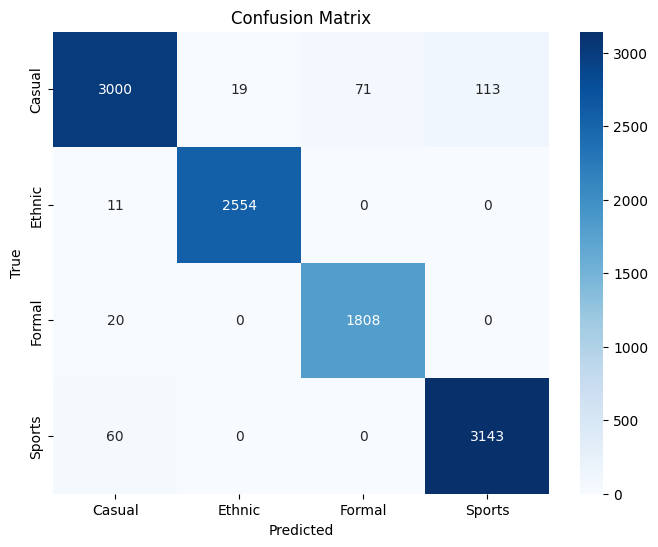

In [ ]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
# testing model for overfitting
x_test_text_embeddings = np.stack(x_test['productEmbedding'].values)
x_test_text_embeddings = x_test_text_embeddings.reshape((-1, 1, 768))
x_test_image_data = np.stack(x_test['image_pixels'])

y_test_pred = model.predict([x_test_text_embeddings, x_test_image_data])
y_test_pred

# printing accuracy
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print(f'test accuracy : {accuracy_score(y_test , y_test_pred_classes)}')




85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step
test accuracy : 0.9218518518518518


Text(0.5, 1.0, 'Confusion Matrix')

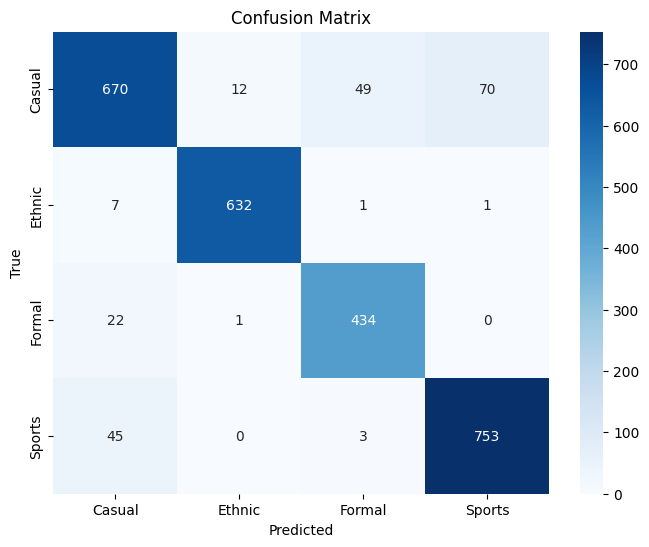

In [ ]:
# printing confusion matrix for test
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test , y_test_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
# evaluating using f1 score on train and test
from sklearn.metrics import f1_score
print(f'train f1 score : {f1_score(y_train , y_train_pred_classes , average="weighted")}')
print(f'test f1 score : {f1_score(y_test , y_test_pred_classes , average="weighted")}')

train f1 score : 0.9726588844774929
test f1 score : 0.9212231267354495


In [ ]:
# connecting the whole preprocessing for image and text into one function
def preprocessing(text , photo):


  def preprocess_image(img):
    """
    Preprocess image:
    - Sharpen
    - Resize to 128x128
    - Normalize [0,1]
    """
    if img is None or not isinstance(img, np.ndarray):
        return None

    # Ensure 3 channels (convert grayscale to BGR)
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Sharpen
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img, -1, kernel)

    # Resize
    resized = cv2.resize(sharpened, (128, 128), interpolation=cv2.INTER_AREA)

    # Normalize
    normalized = resized.astype("float32") / 255.0

    return normalized



  def preprocess_text(sentence) :
      tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
      model = AutoModel.from_pretrained("bert-base-uncased")
      model.eval()

      # Optional: Use GPU if available
      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      model.to(device)

      # Function to get mean pooled embedding
      def get_embedding(text):
          inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
          with torch.no_grad():
              outputs = model(**inputs)
          embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
          return embedding
      return get_embedding(sentence)


  text = preprocess_text(text)
  photo = preprocess_image(photo)
  return text , photo

In [ ]:
# saving preprocessing function for use before model
import joblib

joblib.dump(preprocessing , 'preprocessing.joblib')


['preprocessing.joblib']

In [ ]:
# saving model
model.save('model.h5')

In [ ]:

!pip install -q fastapi uvicorn pyngrok nest_asyncio transformers tensorflow pillow torch torchvision --upgrade

import os, sys, traceback
from google.colab import files
import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
# Removed threading and time imports as they are no longer needed for thread stopping
# import threading
# import time # Import time

# Removed the stop_fastapi_server function as it's not needed in the diagnostic cell
# def stop_fastapi_server(thread_to_stop, server_app):
#     print("Attempting to stop FastAPI server thread...")
#     try:
#         pass
#     except Exception as e:
#         print(f"Error trying to stop server thread: {e}")
#     print("FastAPI server stop signal sent (best effort).")


print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("Torch version:", torch.__version__)
print("CUDA available (torch):", torch.cuda.is_available())
print("Working dir files:")
for f in os.listdir('.'):
    try:
        print(" -", f, os.path.getsize(f))
    except:
        print(" -", f)

# show if model.h5 exists
print("\nChecking for model.h5 ...")
model_file_exists = os.path.exists("model.h5")
print("Exists:", model_file_exists)
if not model_file_exists:
    print("If you haven't uploaded model.h5 yet, upload it now (use files.upload())")
    # optional: provide upload helper
    # uploaded = files.upload()

# Try to load model and tokenizer with detailed errors
def try_load():
    errors = []
    model_loaded = False
    model = None # Initialize model
    tokenizer = None # Initialize tokenizer
    bert_model = None # Initialize bert_model
    device = None # Initialize device


    try:
        print("\nAttempting to load model.h5 ...")
        model = tf.keras.models.load_model("model.h5")
        print("Loaded model.h5 successfully.")
        model_loaded = True
        # print summary small part
        try:
            model.summary()
        except Exception as e:
            print("Could not print model summary:", e)
    except Exception as e:
        errors.append(("model_load", traceback.format_exc()))


    # Load BERT tokenizer and model without extensive try-except for this specific error
    print("\nAttempting to load BERT tokenizer and model (bert-base-uncased) ...")
    try:
        tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
        bert_model = AutoModel.from_pretrained("bert-base-uncased")
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        bert_model.to(device)
        print("Loaded BERT successfully.")
        print("BERT device ->", device)

        # Try tiny dummy predict shape check only if both models are loaded and not None
        if model_loaded and model is not None and tokenizer is not None and bert_model is not None:
            try:
                print("\nRunning a tiny shape-check prediction (no real embedding)...")
                # prepare dummy inputs matching expected shapes
                try:
                    dummy_text_input = tokenizer("dummy text", return_tensors="pt", truncation=True, padding=True).to(device)
                    with torch.no_grad():
                        dummy_text_output = bert_model(**dummy_text_input)
                    dummy_text_embedding = dummy_text_output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
                    dummy_text_input_shaped = np.expand_dims(dummy_text_embedding, axis=(0, 1)) # Shape (1, 1, 768)
                    print("Dummy text embedding shape:", dummy_text_input_shaped.shape)

                    dummy_img_input = np.zeros((1,128,128,3), dtype="float32") # Shape (1, 128, 128, 3)
                    print("Dummy image input shape:", dummy_img_input.shape)

                    preds = model.predict({'text_input': dummy_text_input_shaped, 'image_input': dummy_img_input})
                    print("Model accepted dummy input. preds.shape:", np.array(preds).shape)
                except Exception as e:
                    print("Model rejected dummy input or creating dummy input failed. Traceback:")
                    errors.append(("dummy_predict", traceback.format_exc()))
            except Exception as e:
                 errors.append(("dummy_predict", traceback.format_exc()))
        else:
            print("\nSkipping dummy prediction as models/tokenizers did not load successfully.")

    except Exception as e:
         errors.append(("bert_load", traceback.format_exc()))


    return errors

# Removed the thread checking loop
# for thread in threading.enumerate():
#     if thread.name.startswith("Thread-") and thread.is_alive():
#         print(f"Found potentially running FastAPI thread: {thread.name}. Attempting best effort stop...")
#         print("Cannot directly stop the thread from here. It might exit due to port conflict.")


errs = try_load()
if errs:
    print("\n--- Errors found during diagnostics ---")
    for name, tb in errs:
        print(f"\n[{name}] traceback:\n{tb}")
else:
    print("\nNo errors caught by diagnostics. If you still get errors running the FastAPI cell, paste them here.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 793.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6

Loaded model.h5 successfully.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 1, 768)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │    213,248 │ text_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 57600)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 57600)     │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 57664)     │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  3,690,560 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,923,462 (14.97 MB)

 Trainable params: 3,923,460 (14.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


Attempting to load BERT tokenizer and model (bert-base-uncased) ...
Loaded BERT successfully.
BERT device -> cpu

Running a tiny shape-check prediction (no real embedding)...
Dummy text embedding shape: (1, 1, 768)
Dummy image input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Model accepted dummy input. preds.shape: (1, 4)

No errors caught by diagnostics. If you still get errors running the FastAPI cell, paste them here.


In [ ]:
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTH_TOKEN' with your actual authtoken obtained from the ngrok dashboard
NGROK_AUTH_TOKEN = 'YOUR_NGROK_AUTH_TOKEN'

# Set the ngrok authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

print("ngrok authtoken has been set. You can now try to list tunnels again.")

ngrok authtoken has been set. You can now try to list tunnels again.


In [ ]:
from google.colab import files
files.upload()


Saving model.h5 to model (2).h5
Buffered data was truncated after reaching the output size limit.

In [ ]:
!pip install streamlit transformers pillow numpy tensorflow matplotlib
!npm install -g localtunnel


In [ ]:
!wget -q -O - ipv4.icanhazip.com


34.81.0.4


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://public-maps-obey.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.0.4:8501

2025-11-25 19:18:29.423772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 19:18:57.766643: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
  Stopping...
^C
